C:\Users\renato.vinicius\AppData\Local\Temp\ipykernel_24624\1919965053.py:32: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', s=100, cmap=plt.cm.coolwarm, label='Test')


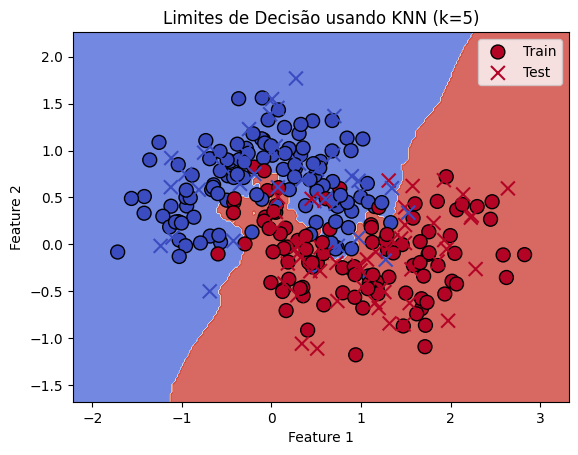

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# 1. Gerar um conjunto de dados não linear (neste caso, o dataset de "moons" do Scikit-learn)
X, y = make_moons(n_samples=300, noise=0.3, random_state=42)

# 2. Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Treinar um modelo KNN (k=5 neste exemplo)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# 4. Criar uma grade de pontos que cubra a área total do gráfico
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                    np.arange(y_min, y_max, 0.02))

# 5. Prever as classes para cada ponto da grade
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 6. Plotar a superfície de decisão (limites de decisão)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# 7. Plotar os pontos de dados de treino e teste
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', s=100, cmap=plt.cm.coolwarm, label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', s=100, cmap=plt.cm.coolwarm, label='Test')

# 8. Personalizar o gráfico
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Limites de Decisão usando KNN (k=5)')
plt.legend()
plt.show()
